In [185]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()

from bokeh.charts import BoxPlot, show
from bokeh.io import push_notebook,show,output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure 
output_notebook()

#%matplotlib inline


Loading BokehJS ...

In [99]:
mat1 = loadmat('693ffd_compareResponse_block_1.mat',squeeze_me=1)
mat2 = loadmat('693ffd_compareResponse_block_2.mat',squeeze_me=1)
mat3 = loadmat('c19968_compareResponse_block_2.mat',squeeze_me=1)
mat4 = loadmat('c19968_compareResponse_block_2.mat',squeeze_me=1)
mat5 = loadmat('acabb1_compareResponse.mat',squeeze_me=1)
mat5

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Sep 09 09:24:46 2016',
 '__version__': '1.0',
 'buttonLocsVecCort': array([  4.41344000e-01,   8.21125120e-01,   4.65920000e-01,
          3.98622720e-01,   4.73088000e-01,   5.46406400e-01,
          8.11417600e-01,   7.01358080e-01,   4.51051520e-01,
          4.44456960e-01,   3.49880320e-01,   4.87464960e-01,
          4.53591040e-01,   4.44661760e-01,   4.49167360e-01,
          4.20003840e-01,   4.13941760e-01,   3.95632640e-01,
          5.16218880e-01,   4.04520960e-01,   4.72473600e-01,
          5.24124160e-01,   4.47528960e-01,   4.61824000e-01,
          4.78617600e-01,   4.05135360e-01,   4.41425920e-01,
          4.32005120e-01,   4.03578880e-01,   5.00695040e-01,
          4.19389440e-01,   4.03578880e-01,   4.52976640e-01,
          3.68476160e-01,   4.20085760e-01,   4.00793600e-01,
          4.60185600e-01,   5.00817920e-01,   4.09600000e-05,
          3.76586240e-01,   4.4691

In [135]:
respLo = mat['respLo']
respHi = mat['respHi']
button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']
button3 = mat3['buttonLocs']
button4 = mat4['buttonLocs']


In [126]:
a = np.arange(0,button1.shape[0])
ndata1 = {n: button1[n] for n in a}

a = np.arange(0,button2.shape[0])
ndata2 = {n: button2[n] for n in a}

a= np.arange(0,button3.shape[0])
ndata3 = {n: button3[n] for n in a}

a = np.arange(0,button4.shape[0])
ndata4 = {n: button4[n] for n in a}

your_keys = {'cort','difference'}
ndata5 = {your_key: 1e-3*mat5[your_key] for your_key in your_keys}

dict_values([array([ 0.441344  ,  0.46592   ,  0.39862272,  0.473088  ,  0.5464064 ,
        0.70135808,  0.45105152,  0.44445696,  0.34988032,  0.48746496,
        0.45359104,  0.44466176,  0.44916736,  0.42000384,  0.41394176,
        0.39563264,  0.51621888,  0.40452096,  0.4724736 ,  0.52412416,
        0.44752896,  0.461824  ,  0.4786176 ,  0.40513536,  0.44142592,
        0.43200512,  0.40357888,  0.50069504,  0.41938944,  0.40357888,
        0.45297664,  0.36847616,  0.42008576,  0.4007936 ,  0.4601856 ,
        0.50081792,  0.37658624,  0.44691456,  0.40353792,  0.4339712 ,
        0.4601856 ,  0.40443904,  0.44290048,  0.42233856,  0.50343936,
        0.47415296,  0.4896768 ,  0.44527616,  0.66228224,  0.58032128,
        0.40001536,  0.66879488,  0.54890496,  0.5228544 ,  0.454656  ,
        0.5136384 ,  0.526336  ,  0.503808  ,  0.48635904,  0.6848512 ,
        0.47693824,  0.48185344,  0.43593728,  0.49790976,  0.42921984,
        0.4950016 ,  0.4651008 ,  0.47276032,  0.45

In [199]:
dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')

dataFdict3 = pd.DataFrame.from_dict(ndata3,orient='columns')

dataFdict4 = pd.DataFrame.from_dict(ndata4,orient='columns')

dataFdict_5_1 = pd.DataFrame(ndata5['cort'],columns=['200 ms '])
dataFdict_5_2 = pd.DataFrame(ndata5['difference'],columns=['tactor'])
dataFdict5 = pd.concat([dataFdict_5_1,dataFdict_5_2])


In [200]:
dataFdict1.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict2.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict3.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict4.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']

In [201]:
dataMelt1 = pd.melt(dataFdict1)
dataMelt1['sid'] = '693ffd'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
dataMelt2['sid'] = '693ffd'
dataMelt2['block'] = '2'



               
dataMelt3 = pd.melt(dataFdict3)
dataMelt3['sid'] = 'c19968'
dataMelt3['block'] = '1'



dataMelt4 = pd.melt(dataFdict4)
dataMelt4['sid'] = 'c19968'
dataMelt4['block'] = '2'

dataMelt5 = pd.melt(dataFdict5)
dataMelt5['sid'] = 'acabb1'
dataMelt5['block'] = '1'

In [202]:
dataMelt1.rename(columns = {'variable':'experiment','value':'response times'}, inplace = True)
dataMelt2.rename(columns = {'variable':'experiment','value':'response times'}, inplace = True)
dataMelt3.rename(columns = {'variable':'experiment','value':'response times'}, inplace = True)
dataMelt4.rename(columns = {'variable':'experiment','value':'response times'}, inplace = True)
dataMelt5.rename(columns = {'variable':'experiment','value':'response times'}, inplace = True)
#dataMelt4
#dataMelt5

In [203]:
frames = [dataMelt1,dataMelt2,dataMelt3,dataMelt4,dataMelt5]
result = pd.concat(frames)
result
resultTrim = result[(result['response times'] < 1) & (result['response times'] > 0.1)]
resultTrim.groupby(['experiment','sid','block']).mean()
resultTrim
#resultNoNa = result.dropna()
#resultNoNa

,experiment,response times,sid,block
1,tactor,0.506757,693ffd,1
2,tactor,0.477061,693ffd,1
3,tactor,0.150651,693ffd,1
4,tactor,0.300769,693ffd,1
5,tactor,0.155894,693ffd,1
6,tactor,0.131727,693ffd,1
7,tactor,0.152494,693ffd,1
8,tactor,0.176374,693ffd,1
9,tactor,0.181862,693ffd,1
10,tactor,0.119398,693ffd,1


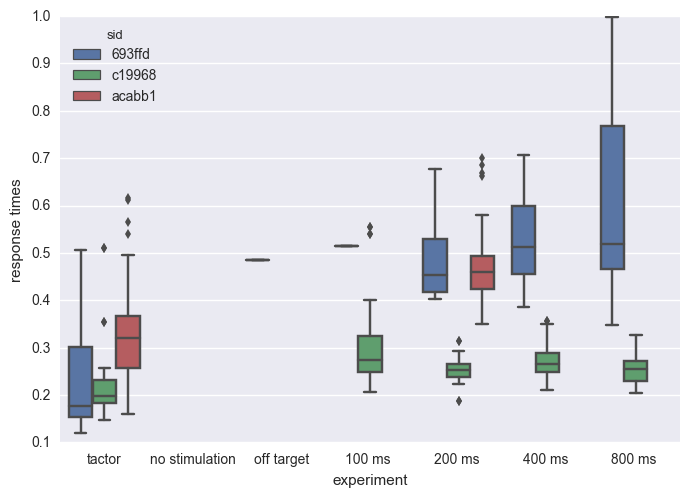

In [219]:
frame1 = sns.boxplot(x = 'experiment',y='response times',hue='sid', data = resultTrim,order = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
#frame1.axes.get_xaxis().set_visible(False)
#frame1.legend(resultTrim.experiment)

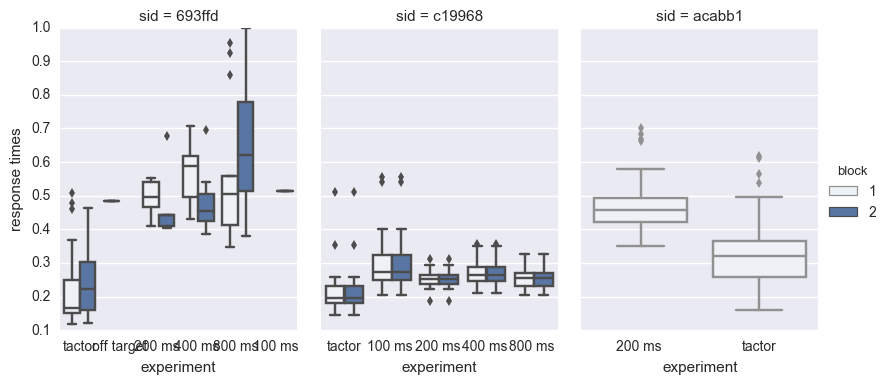

In [222]:
g = sns.FacetGrid(resultTrim,col="sid",size=4,aspect=0.7,sharex=False)
(g.map(sns.boxplot, "experiment","response times","block")
 .despine(left=True)
 .add_legend(title="block"))

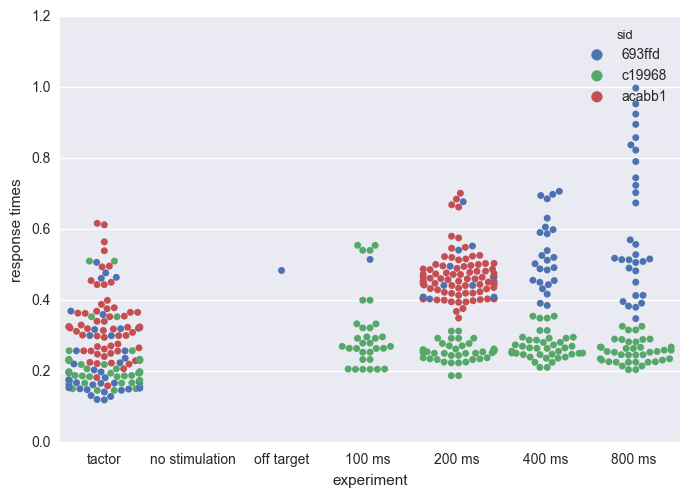

In [224]:
frame2 = sns.swarmplot(x = 'experiment',y='response times',hue='sid',data = resultTrim,order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])

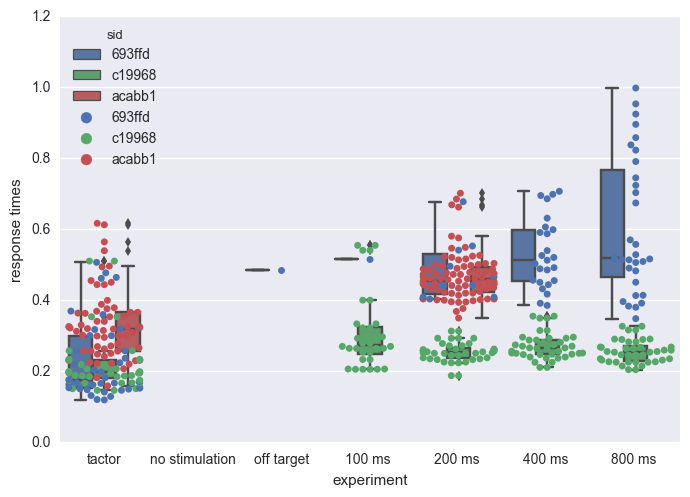

In [225]:
frame3 = sns.boxplot(x = 'experiment',y='response times',hue='sid',data = resultTrim,order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
frame3 = sns.swarmplot(x = 'experiment',y='response times',data = resultTrim,hue='sid',order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
#frame3 = sns.swarmplot(x = 'experiment',y='response times',data = resultTrim,hue='sid',color="0.1")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132769e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13a460438>]], dtype=object)

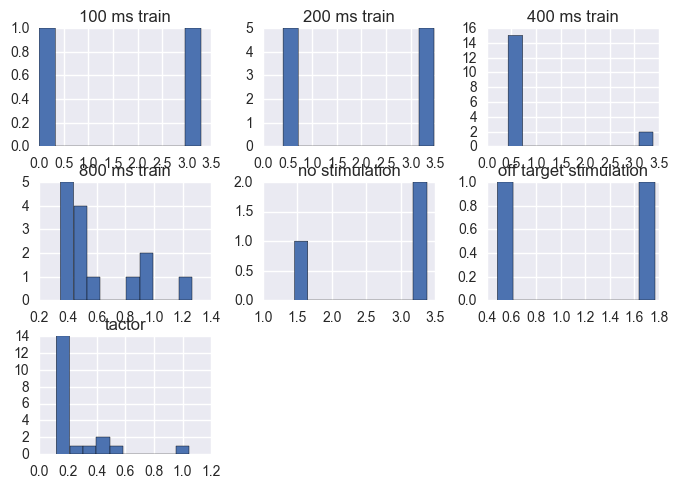

In [207]:
dataFdict.hist()

TypeError: cannot perform reduce with flexible type

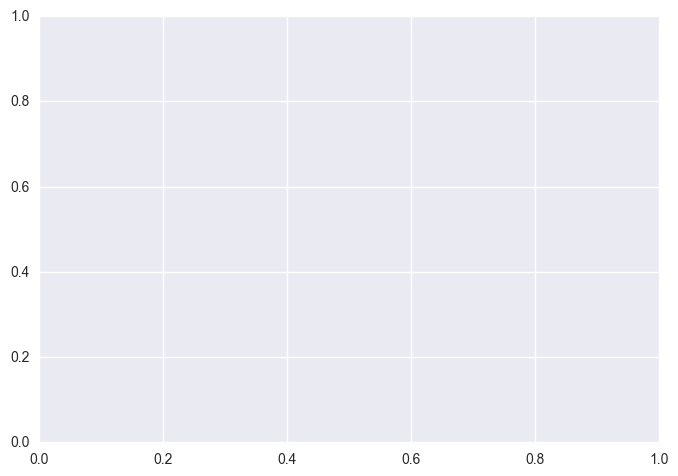

In [208]:
fig, ax = plt.subplots()
for a in dataFdict.columns:
    sns.distplot(a, bins=range(1, 110, 10), ax=ax, kde=False)
ax.set_xlim([0, 100])

In [ ]:
#from bokeh.charts import BoxPlot, show
#from bokeh.sampledata.autompg import autompg as df
#output_notebook


In [226]:

p = BoxPlot(resultTrim, values='response times', label=['sid','experiment'],color='experiment',
            title="Response Times")

show(p)

In [ ]:
df

In [ ]:
dataFdict['tactor']

In [ ]:
x = values[0]
y = values[1]

In [ ]:
a = []
a.append(x)
a.append(y)

In [ ]:
a[1][0,1]

In [ ]:
a = pd.DataFrame([values,columns=keys)

In [ ]:
c = [button[0,n] for n in np.arange(0,button.shape[1])]

In [ ]:
c.shape

In [ ]:
d = zip(c)

In [ ]:
d

In [ ]:
b.items()

In [ ]:
temp = pd.DataFrame.from_dict(button,orient='columns')

In [ ]:
temp

In [ ]:
temp2 = pd.melt(temp)

In [ ]:
temp2

In [ ]:
sns.boxplot(data=dataF)

In [ ]:
temp3